In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 500
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '../Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 660 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Healthy': 0, 'Quick_wilt': 1, 'Slow_wilt': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Healthy', 'Quick_wilt', 'Slow_wilt']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 ...

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '../Dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 81 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '../Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 85 images belonging to 3 classes.


In [9]:
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

In [10]:
validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

In [11]:
train_dataset = train_dataset.repeat()  # Repeat indefinitely
validation_dataset = validation_dataset.repeat()

In [12]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 ...

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  ...
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]]

 [[0.81568635 0.81568635 0.81568635]
  [0.81568635 0.81568635 0.81568635]


In [53]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Users\Harthik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 498, 498, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 247, 247, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 121, 121, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,927,459 (7.35 MB)

 Trainable params: 1,927,459 (7.35 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [56]:
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    batch_size=32,
    validation_data=validation_dataset,
    validation_steps=len(validation_generator),
    verbose=1,
    epochs=20,
)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3067 - loss: 1.1056 - val_accuracy: 0.4568 - val_loss: 1.0201
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5271 - loss: 0.9468 - val_accuracy: 0.6543 - val_loss: 0.7676
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6352 - loss: 0.7303 - val_accuracy: 0.8148 - val_loss: 0.4361
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8306 - loss: 0.4915 - val_accuracy: 0.8642 - val_loss: 0.3429
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8812 - loss: 0.3231 - val_accuracy: 0.8889 - val_loss: 0.3418
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9015 - loss: 0.3085 - val_accuracy: 0.8395 - val_loss: 0.4759
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8709 - loss: 0.4432 - val_accuracy: 0.9259 - val_loss: 0.2979
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9089 - loss: 0.2446 - val_accuracy: 0.9383 - val_loss:

In [57]:
scores = model.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9354 - loss: 0.1680


In [58]:
scores

[0.13223209977149963, 0.9411764740943909]

In [59]:
history

In [60]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 21}

In [61]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [62]:
type(history.history['loss'])

list

In [63]:
len(history.history['loss'])

20

In [64]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.0920724868774414,
 0.8792746663093567,
 0.6609655022621155,
 0.46686869859695435,
 0.31770288944244385]

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [66]:
val_acc

[0.45679011940956116,
 0.654321014881134,
 0.8148148059844971,
 0.8641975522041321,
 0.8888888955116272,
 0.8395061492919922,
 0.9259259104728699,
 0.9382715821266174,
 0.9876543283462524,
 0.9629629850387573,
 0.9753086566925049,
 0.9753086566925049,
 0.9629629850387573,
 1.0,
 0.9259259104728699,
 0.9876543283462524,
 0.9753086566925049,
 0.9506173133850098,
 0.9382715821266174,
 0.9753086566925049]

In [67]:
acc

[0.35757574439048767,
 0.581818163394928,
 0.699999988079071,
 0.8393939137458801,
 0.8969696760177612,
 0.903030276298523,
 0.8530303239822388,
 0.9060605764389038,
 0.9454545378684998,
 0.9439393877983093,
 0.9545454382896423,
 0.9681817889213562,
 0.9545454382896423,
 0.9696969985961914,
 0.9696969985961914,
 0.9666666388511658,
 0.9681817889213562,
 0.9227272868156433,
 0.9333333373069763,
 0.9757575988769531]

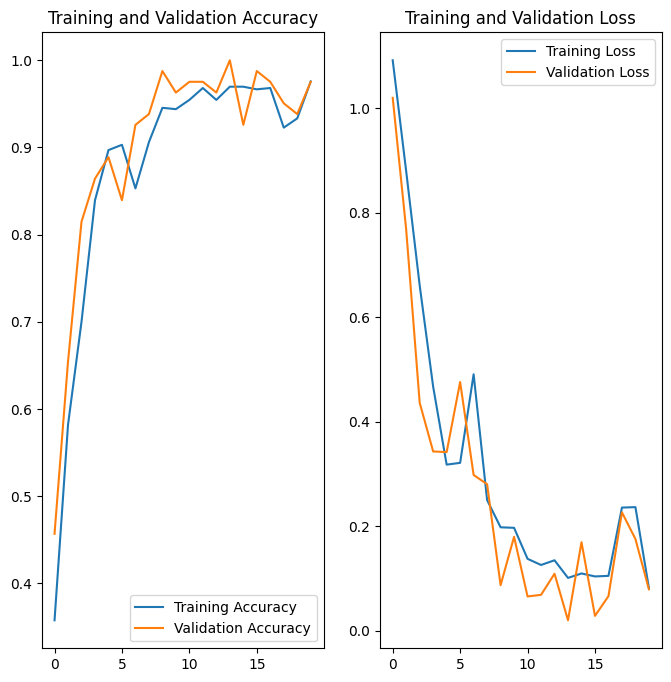

In [68]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
predicted label: Healthy


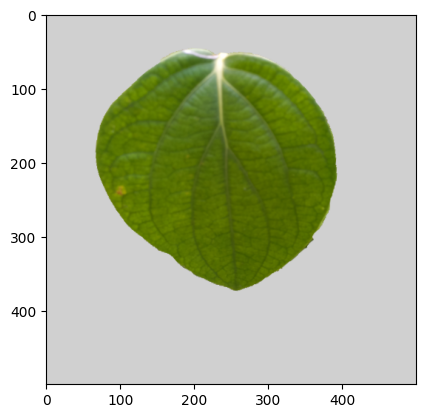

In [69]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [70]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [71]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


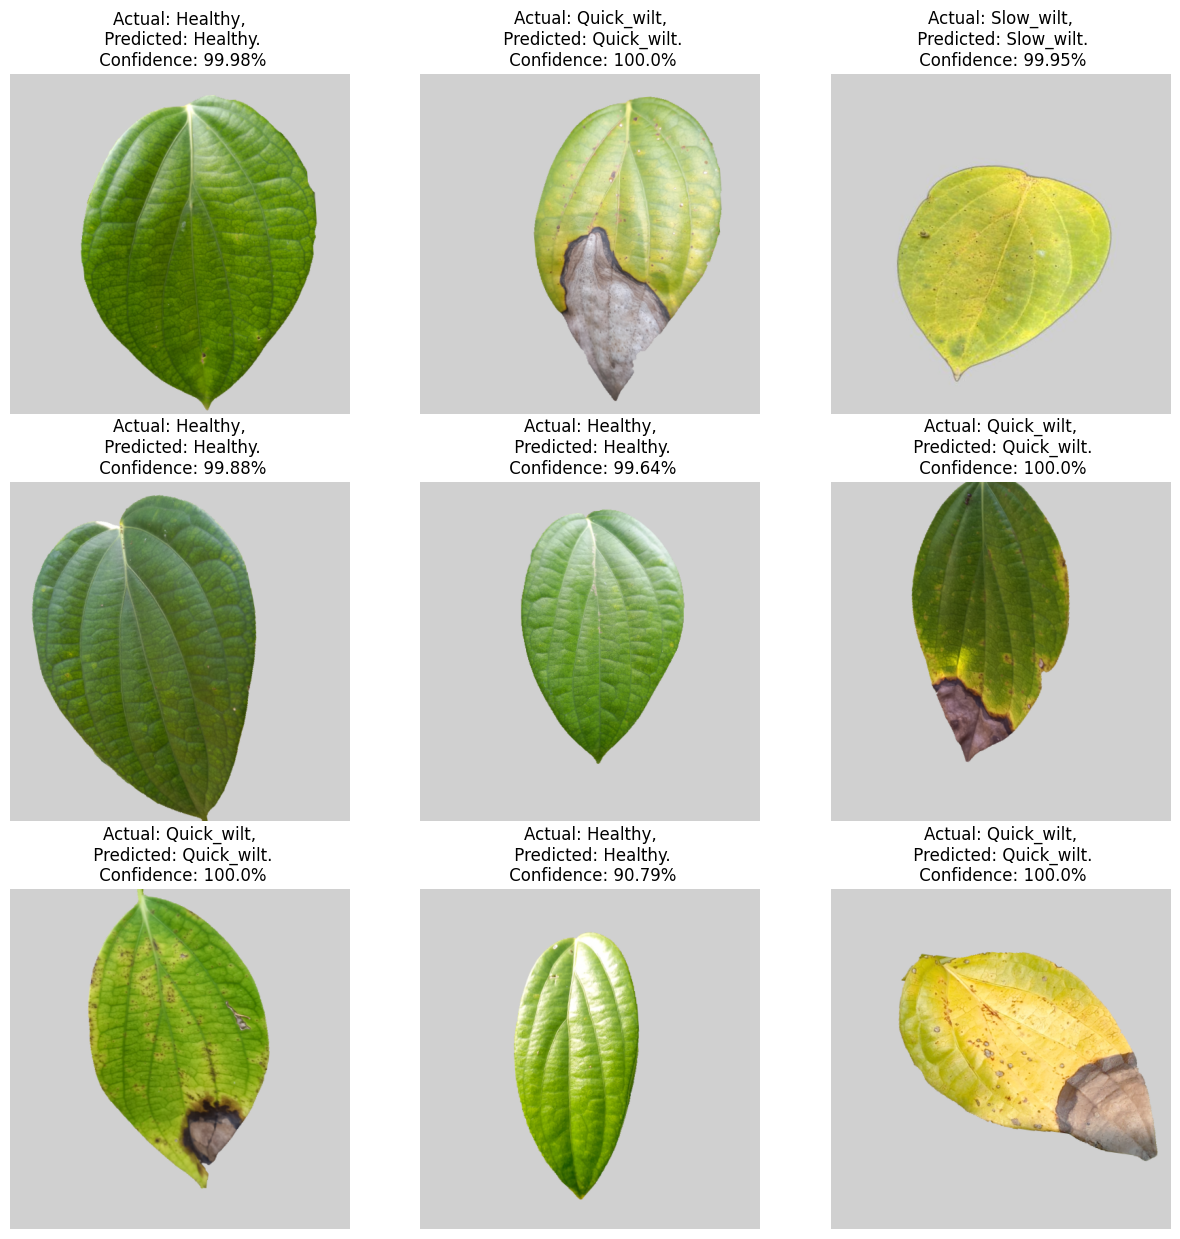

In [72]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [73]:
model.export("../Models/Black_Pepper")

INFO:tensorflow:Assets written to: ../Models/Black_Pepper\assets


INFO:tensorflow:Assets written to: ../Models/Black_Pepper\assets


Saved artifact at '../Models/Black_Pepper'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name='keras_tensor_17')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1961883782800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883788368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883788560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883789136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883789328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883789904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883790096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883790672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883790864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883791440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883791632: TensorSpec

In [74]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Harthik\AppData\Local\Temp\tmp02ax1buq\assets


INFO:tensorflow:Assets written to: C:\Users\Harthik\AppData\Local\Temp\tmp02ax1buq\assets


Saved artifact at 'C:\Users\Harthik\AppData\Local\Temp\tmp02ax1buq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name='keras_tensor_17')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1961883782800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883788368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883788560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883789136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883789328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883789904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883790096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883790672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883790864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1961883791440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [75]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [76]:
input_details

[{'name': 'serving_default_keras_tensor_17:0',
  'index': 0,
  'shape': array([  1, 500, 500,   3]),
  'shape_signature': array([ -1, 500, 500,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [77]:
output_details

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 33,
  'shape': array([1, 3]),
  'shape_signature': array([-1,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [78]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dataset = image_dataset_from_directory(
    '../Dataset/test',  # Replace with your actual test dataset directory
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    label_mode='int',  # Assuming you're using integer labels (could be 'categorical' or 'binary')
)

Found 85 files belonging to 3 classes.


In [79]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [80]:
test_dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [81]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [82]:
count = 0
for image, label in test_dataset.take(5):
    print(label)
    
print(count)

tf.Tensor([1 1 2 2 0 0 2 2 1 0 2 1 2 0 1 2 2 2 1 2 1 0 0 1 0 2 2 1 0 2 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 2 0 1 2 1 1 1 1 0 2 2 0 2 0 1 1 2 0 1 0 0 2 0 1 2 1 0 1 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 2 2 2 0 1 0 1 1 1 2 0 2 0 1 0 0 2 0 2 0], shape=(21,), dtype=int32)
0


In [83]:
for image, label in test_dataset.unbatch().take(5):
    print("image shape",image.shape)
    print("label",label)

image shape (500, 500, 3)
label tf.Tensor(0, shape=(), dtype=int32)
image shape (500, 500, 3)
label tf.Tensor(0, shape=(), dtype=int32)
image shape (500, 500, 3)
label tf.Tensor(0, shape=(), dtype=int32)
image shape (500, 500, 3)
label tf.Tensor(1, shape=(), dtype=int32)
image shape (500, 500, 3)
label tf.Tensor(1, shape=(), dtype=int32)


In [84]:
for image, label in test_dataset.unbatch().take(5):
    interpreter.set_tensor(input_index, [image.numpy().astype(np.float32)])
    interpreter.invoke()

    output = interpreter.get_tensor(output_index)

In [85]:
predicted_labels = []
actual_labels = []

for image, label in test_dataset.unbatch():
    interpreter.set_tensor(input_index, [image])
    interpreter.invoke()

    output = interpreter.get_tensor(output_index)
    predicted_labels.append(np.argmax(output[0]))
    actual_labels.append(label.numpy())

In [86]:
predicted_labels[:10]

[2, 2, 1, 0, 0, 2, 1, 2, 0, 2]

In [87]:
actual_labels[:10]

[2, 2, 1, 0, 0, 1, 1, 2, 0, 2]

In [88]:
comparison_vector = np.array(predicted_labels) == np.array(actual_labels)
comparison_vector[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True])

In [89]:
np.array([True,False,True]).mean()

0.6666666666666666

In [90]:
accuracy = comparison_vector.mean()
accuracy

0.8823529411764706